In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer

In [ ]:
mnist_data, info = tfds.load("fashion_mnist", with_info='true')

In [ ]:
print(info)

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [ ]:
sentences = [
             'I love dog',
             'I love cat',
             'I love a cat',
             'I love a cat?'
]

tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(sentences)
wordIndex = tokenizer.word_index
print(wordIndex)

{'i': 1, 'love': 2, 'cat': 3, 'a': 4, 'dog': 5}


In [ ]:
sentences = [
             'I love dog',
             'I love cat',
             'I love a cat',
             'I love a cat?'
]

tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(sentences)
sqeuences = tokenizer.texts_to_sequences(sentences)
print(sqeuences)

[[1, 2, 5], [1, 2, 3], [1, 2, 4, 3], [1, 2, 4, 3]]


In [ ]:
testData = [
             'I love pig',
             'I love a goat'
]
sqeuences = tokenizer.texts_to_sequences(testData)
print(sqeuences)

[[1, 2], [1, 2, 4]]


In [ ]:
tokenizer = Tokenizer(num_words=100, oov_token='OOV')
tokenizer.fit_on_texts(sentences)
sqeuences = tokenizer.texts_to_sequences(testData)
wordIndex = tokenizer.word_index
print(wordIndex)
print(sqeuences)

{'OOV': 1, 'i': 2, 'love': 3, 'cat': 4, 'a': 5, 'dog': 6}
[[2, 3, 1], [2, 3, 5, 1]]


In [ ]:
tranData = tfds.load('imdb_reviews', split='train')

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteQ5272G/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteQ5272G/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteQ5272G/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
imdbSentences = list()
for item in tranData:
  imdbSentences.append(str(item['text']))

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(imdbSentences)

wordIndex = tokenizer.word_index
print(wordIndex)

NameError: ignored

In [ ]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

In [ ]:
import json
with open("/content/sarcasmDataset.json", 'r') as f:
  data = json.load(f)

sentences = list()
labels = list()
urls = list()

for item in data:
  sentence = item['headline'].lower()
  sentences.append(sentence)
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

In [ ]:
print(len(sentences))

28619


In [ ]:
training_size = 24000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=120, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = keras.Sequential(
    [
     keras.layers.Embedding(10000, 16),
     keras.layers.GlobalAveragePooling1D(),
     keras.layers.Dense(24, activation='relu'),
     keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(training_padded, training_labels,
          epochs=100, verbose=1,
          validation_data=(testing_padded, testing_labels))

Epoch 1/100
625/625 [==============================] - 6s 6ms/step - loss: 0.6694 - accuracy: 0.5993 - val_loss: 0.5885 - val_accuracy: 0.7400
Epoch 2/100
625/625 [==============================] - 3s 5ms/step - loss: 0.4938 - accuracy: 0.7763 - val_loss: 0.4460 - val_accuracy: 0.7929
Epoch 3/100
625/625 [==============================] - 3s 5ms/step - loss: 0.4134 - accuracy: 0.8115 - val_loss: 0.4044 - val_accuracy: 0.8087
Epoch 4/100
625/625 [==============================] - 3s 5ms/step - loss: 0.3909 - accuracy: 0.8215 - val_loss: 0.4039 - val_accuracy: 0.8074
Epoch 5/100
625/625 [==============================] - 3s 5ms/step - loss: 0.3788 - accuracy: 0.8270 - val_loss: 0.4112 - val_accuracy: 0.7992
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 0.3715 - accuracy: 0.8295 - val_loss: 0.3869 - val_accuracy: 0.8213
Epoch 7/100
625/625 [==============================] - 3s 5ms/step - loss: 0.3676 - accuracy: 0.8316 - val_loss: 0.3868 - val_accuracy: 0.8235

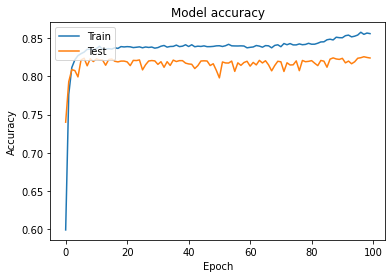

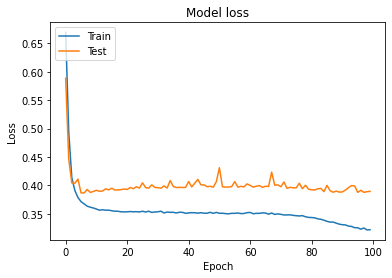

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model = keras.Sequential(
    [
     keras.layers.Embedding(10000, 16),
     keras.layers.GlobalAveragePooling1D(),
     keras.layers.Dense(128, activation='relu'),
     keras.layers.Dense(64, activation='relu'),
     keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2176      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 170,497
Trainable params: 170,497
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(training_padded, training_labels,
          epochs=30, verbose=1,
          validation_data=(testing_padded, testing_labels))

Epoch 1/30
625/625 [==============================] - 6s 6ms/step - loss: 0.5752 - accuracy: 0.6694 - val_loss: 0.4112 - val_accuracy: 0.8078
Epoch 2/30
625/625 [==============================] - 3s 5ms/step - loss: 0.4022 - accuracy: 0.8125 - val_loss: 0.3897 - val_accuracy: 0.8198
Epoch 3/30
625/625 [==============================] - 3s 5ms/step - loss: 0.3811 - accuracy: 0.8228 - val_loss: 0.3922 - val_accuracy: 0.8151
Epoch 4/30
625/625 [==============================] - 3s 5ms/step - loss: 0.3730 - accuracy: 0.8263 - val_loss: 0.4100 - val_accuracy: 0.8014
Epoch 5/30
625/625 [==============================] - 3s 5ms/step - loss: 0.3726 - accuracy: 0.8278 - val_loss: 0.3910 - val_accuracy: 0.8161
Epoch 6/30
625/625 [==============================] - 3s 5ms/step - loss: 0.3653 - accuracy: 0.8331 - val_loss: 0.4087 - val_accuracy: 0.8124
Epoch 7/30
625/625 [==============================] - 3s 5ms/step - loss: 0.3660 - accuracy: 0.8310 - val_loss: 0.3986 - val_accuracy: 0.8109
Epoch 

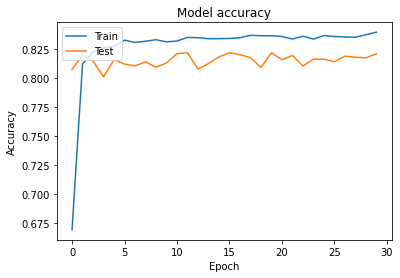

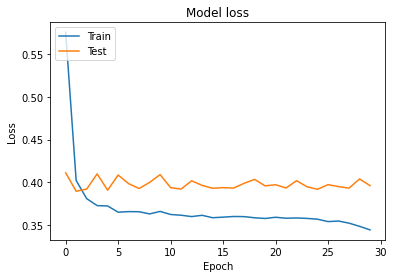

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model = keras.Sequential(
    [
     keras.layers.Embedding(10000, 16),
     keras.layers.GlobalAveragePooling1D(),
     keras.layers.Dense(128, activation='relu'),
     keras.layers.Dense(64, activation='relu'),
     keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               2176      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 170,497
Trainable params: 170,497
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(training_padded, training_labels,
          epochs=100, verbose=1,
          validation_data=(testing_padded, testing_labels))

Epoch 1/100
625/625 [==============================] - 4s 6ms/step - loss: 0.5793 - accuracy: 0.6611 - val_loss: 0.4254 - val_accuracy: 0.8022
Epoch 2/100
625/625 [==============================] - 3s 5ms/step - loss: 0.4024 - accuracy: 0.8136 - val_loss: 0.4059 - val_accuracy: 0.8102
Epoch 3/100
625/625 [==============================] - 3s 5ms/step - loss: 0.3829 - accuracy: 0.8227 - val_loss: 0.3995 - val_accuracy: 0.8073
Epoch 4/100
625/625 [==============================] - 3s 5ms/step - loss: 0.3768 - accuracy: 0.8256 - val_loss: 0.3919 - val_accuracy: 0.8158
Epoch 5/100
625/625 [==============================] - 3s 5ms/step - loss: 0.3710 - accuracy: 0.8306 - val_loss: 0.3925 - val_accuracy: 0.8221
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 0.3673 - accuracy: 0.8306 - val_loss: 0.3955 - val_accuracy: 0.8216
Epoch 7/100
625/625 [==============================] - 3s 5ms/step - loss: 0.3672 - accuracy: 0.8307 - val_loss: 0.3917 - val_accuracy: 0.8163

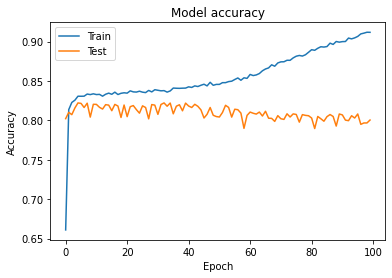

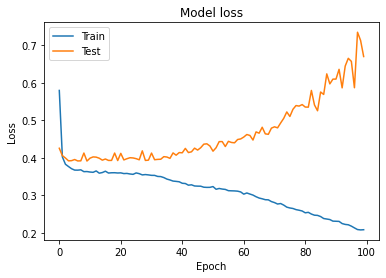

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model = keras.Sequential(
    [
     keras.layers.Embedding(10000, 16),
     keras.layers.Bidirectional(keras.layers.LSTM(16)),
     keras.layers.Dense(24, activation='relu'),
     keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 32)                4224      
_________________________________________________________________
dense (Dense)                (None, 24)                792       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 165,041
Trainable params: 165,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(training_padded, training_labels,
          epochs=30, verbose=1,
          validation_data=(testing_padded, testing_labels))

Epoch 1/30
750/750 [==============================] - 17s 12ms/step - loss: 0.4491 - accuracy: 0.7799 - val_loss: 0.3862 - val_accuracy: 0.8151
Epoch 2/30
750/750 [==============================] - 8s 11ms/step - loss: 0.3666 - accuracy: 0.8313 - val_loss: 0.3765 - val_accuracy: 0.8242
Epoch 3/30
750/750 [==============================] - 8s 11ms/step - loss: 0.3483 - accuracy: 0.8410 - val_loss: 0.3667 - val_accuracy: 0.8238
Epoch 4/30
750/750 [==============================] - 8s 11ms/step - loss: 0.3315 - accuracy: 0.8515 - val_loss: 0.3709 - val_accuracy: 0.8205
Epoch 5/30
750/750 [==============================] - 8s 11ms/step - loss: 0.3170 - accuracy: 0.8593 - val_loss: 0.3590 - val_accuracy: 0.8324
Epoch 6/30
750/750 [==============================] - 8s 11ms/step - loss: 0.3060 - accuracy: 0.8658 - val_loss: 0.3743 - val_accuracy: 0.8311
Epoch 7/30
750/750 [==============================] - 8s 11ms/step - loss: 0.2965 - accuracy: 0.8692 - val_loss: 0.3648 - val_accuracy: 0.835

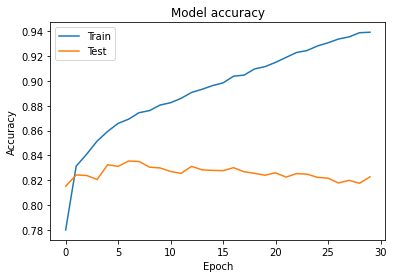

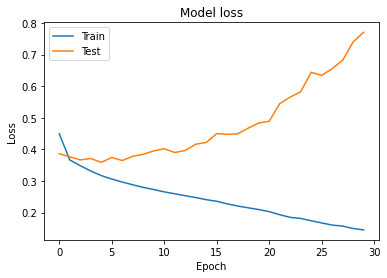

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import tensorflow_hub as hub
hubLayer = hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1",
    output_shape=[20],  # Outputs a tensor with shape [batch_size, 20].
    input_shape=[],     # Expects a tensor of shape [batch_size] as input.
    dtype=tf.string,
    trainable=False) 

In [ ]:
model = keras.Sequential(
    [
     hubLayer,
     keras.layers.Dense(16, activation='relu'),
     keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 20)                400020    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 353
Non-trainable params: 400,020
_________________________________________________________________


In [ ]:
tf.config.run_functions_eagerly(True)
history = model.fit(training_sentences, training_labels,
          epochs=50, verbose=1,
          validation_data=(testing_sentences, testing_labels))

Epoch 1/50
  5/750 [..............................] - ETA: 10s - loss: 0.7314 - accuracy: 0.5312

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


750/750 [==============================] - 12s 16ms/step - loss: 0.6626 - accuracy: 0.6051 - val_loss: 0.6343 - val_accuracy: 0.6436
Epoch 2/50
750/750 [==============================] - 12s 16ms/step - loss: 0.6309 - accuracy: 0.6472 - val_loss: 0.6173 - val_accuracy: 0.6603
Epoch 3/50
750/750 [==============================] - 12s 16ms/step - loss: 0.6222 - accuracy: 0.6545 - val_loss: 0.6117 - val_accuracy: 0.6653
Epoch 4/50
750/750 [==============================] - 12s 16ms/step - loss: 0.6173 - accuracy: 0.6593 - val_loss: 0.6078 - val_accuracy: 0.6709
Epoch 5/50
750/750 [==============================] - 12s 16ms/step - loss: 0.6147 - accuracy: 0.6645 - val_loss: 0.6083 - val_accuracy: 0.6655
Epoch 6/50
750/750 [==============================] - 12s 17ms/step - loss: 0.6121 - accuracy: 0.6685 - val_loss: 0.6048 - val_accuracy: 0.6731
Epoch 7/50
750/750 [==============================] - 12s 16ms/step - loss: 0.6107 - accuracy: 0.6683 - val_loss: 0.6035 - val_accuracy: 0.6724
Epo

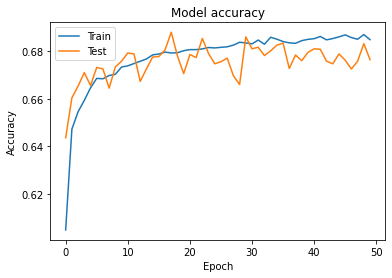

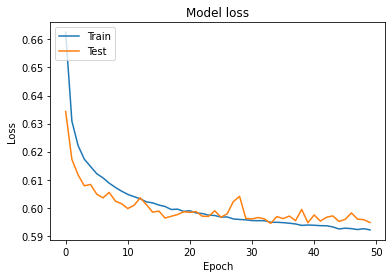

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
!wget --no-check-certificate \
  https://huggingface.co/stanfordnlp/glove/resolve/main/glove.twitter.27B.zip \
  - 0 /content/glove.zip

--2021-08-29 22:28:15--  https://huggingface.co/stanfordnlp/glove/resolve/main/glove.twitter.27B.zip
Resolving huggingface.co (huggingface.co)... 52.44.185.180, 34.200.164.230, 34.195.144.223, ...
Connecting to huggingface.co (huggingface.co)|52.44.185.180|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/stanfordnlp/glove/3123e7f5c3f6a30095d413b12fc3284bbf717acd2a9bed63d1c7c13bf5223352 [following]
--2021-08-29 22:28:15--  https://cdn-lfs.huggingface.co/stanfordnlp/glove/3123e7f5c3f6a30095d413b12fc3284bbf717acd2a9bed63d1c7c13bf5223352
Resolving cdn-lfs.huggingface.co (cdn-lfs.huggingface.co)... 52.85.224.78, 52.85.224.95, 52.85.224.129, ...
Connecting to cdn-lfs.huggingface.co (cdn-lfs.huggingface.co)|52.85.224.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408741 (1.4G) [application/zip]
Saving to: ‘glove.twitter.27B.zip’

glove.twitter.27B.z 100%[===================>]   1.42G  76.7MB/s    in

In [ ]:
import os
import zipfile

f = '/content/glove.twitter.27B.zip'
zip = zipfile.ZipFile(f, 'r')
zip.extractall('/content')
zip.close()

In [ ]:
glove_embdding = dict()
with open('/content/glove.twitter.27B.25d.txt', 'r') as f:
  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    glove_embdding[word] = coefs

In [ ]:
print(glove_embdding['frog'])

[-1.2158   -0.74924   0.91941   0.72985  -0.12917  -0.19555   1.2365
 -0.77196   0.85161   0.11922   0.16816   0.33334  -2.0845   -0.53471
  0.013538  0.18178   1.2831    0.089331  0.57264   0.50694   0.27134
  0.66504   0.54097  -0.58377   0.67097 ]


In [ ]:
vocab_size = 13200
embedding_dim = 25

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
  if index > vocab_size - 1:
    break
  else:
    embedding_vector = glove_embdding.get(word)
    if embedding_vector is not None:
      embedding_matrix[index] = embedding_vector

In [ ]:
model = keras.Sequential(
    [
     keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False),
     keras.layers.Bidirectional(keras.layers.LSTM(embedding_dim, return_sequences=True)),
     keras.layers.Bidirectional(keras.layers.LSTM(embedding_dim)),
     keras.layers.Dense(24, activation='relu'),
     keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 25)          330000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 50)          10200     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 50)                15200     
_________________________________________________________________
dense_6 (Dense)              (None, 24)                1224      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 356,649
Trainable params: 26,649
Non-trainable params: 330,000
_________________________________________________________________


In [ ]:
history = model.fit(training_padded, training_labels,
          epochs=30, verbose=1,
          validation_data=(testing_padded, testing_labels))

Epoch 1/30
  2/750 [..............................] - ETA: 41s - loss: 0.7005 - accuracy: 0.3906

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


750/750 [==============================] - 43s 57ms/step - loss: 0.5597 - accuracy: 0.6915 - val_loss: 0.4783 - val_accuracy: 0.7619
Epoch 2/30
750/750 [==============================] - 42s 57ms/step - loss: 0.4633 - accuracy: 0.7695 - val_loss: 0.4402 - val_accuracy: 0.7850
Epoch 3/30
750/750 [==============================] - 43s 57ms/step - loss: 0.4327 - accuracy: 0.7895 - val_loss: 0.4202 - val_accuracy: 0.8013
Epoch 4/30
750/750 [==============================] - 43s 57ms/step - loss: 0.4086 - accuracy: 0.8071 - val_loss: 0.4064 - val_accuracy: 0.8093
Epoch 5/30
750/750 [==============================] - 41s 54ms/step - loss: 0.3911 - accuracy: 0.8162 - val_loss: 0.4147 - val_accuracy: 0.8004
Epoch 6/30
750/750 [==============================] - 41s 54ms/step - loss: 0.3798 - accuracy: 0.8223 - val_loss: 0.3994 - val_accuracy: 0.8067
Epoch 7/30
750/750 [==============================] - 42s 57ms/step - loss: 0.3678 - accuracy: 0.8278 - val_loss: 0.4013 - val_accuracy: 0.8101
Epo

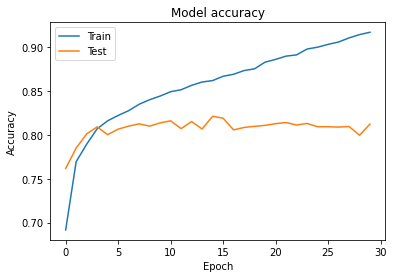

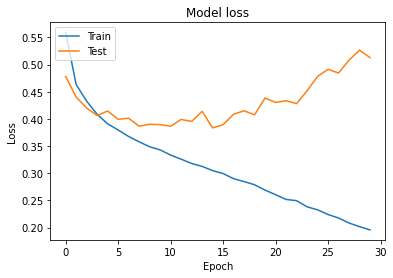

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model = keras.Sequential(
    [
     keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False),
     keras.layers.Bidirectional(keras.layers.LSTM(embedding_dim, return_sequences=True)),
     keras.layers.Bidirectional(keras.layers.LSTM(embedding_dim)),
     keras.layers.Dense(16, activation='relu'),
     keras.layers.Dense(1, activation='sigmoid')
    ]
)

adam = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 25)          330000    
_________________________________________________________________
bidirectional_10 (Bidirectio (None, None, 50)          10200     
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 50)                15200     
_________________________________________________________________
dense_14 (Dense)             (None, 16)                816       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 356,233
Trainable params: 26,233
Non-trainable params: 330,000
_________________________________________________________________


In [ ]:
  history = model.fit(training_padded, training_labels,
          epochs=30, verbose=1,
          validation_data=(testing_padded, testing_labels))

Epoch 1/30
  2/750 [..............................] - ETA: 39s - loss: 0.6916 - accuracy: 0.5469

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


750/750 [==============================] - 44s 59ms/step - loss: 0.6893 - accuracy: 0.5367 - val_loss: 0.6866 - val_accuracy: 0.5441
Epoch 2/30
750/750 [==============================] - 45s 60ms/step - loss: 0.6861 - accuracy: 0.5340 - val_loss: 0.6828 - val_accuracy: 0.5538
Epoch 3/30
750/750 [==============================] - 48s 64ms/step - loss: 0.6822 - accuracy: 0.5518 - val_loss: 0.6779 - val_accuracy: 0.5804
Epoch 4/30
750/750 [==============================] - 45s 60ms/step - loss: 0.6770 - accuracy: 0.5781 - val_loss: 0.6713 - val_accuracy: 0.6081
Epoch 5/30
750/750 [==============================] - 44s 59ms/step - loss: 0.6697 - accuracy: 0.6050 - val_loss: 0.6622 - val_accuracy: 0.6352
Epoch 6/30
750/750 [==============================] - 46s 61ms/step - loss: 0.6597 - accuracy: 0.6305 - val_loss: 0.6500 - val_accuracy: 0.6456
Epoch 7/30
750/750 [==============================] - 45s 60ms/step - loss: 0.6468 - accuracy: 0.6477 - val_loss: 0.6348 - val_accuracy: 0.6614
Epo

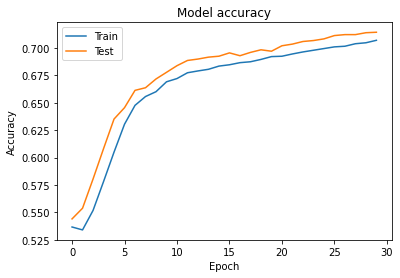

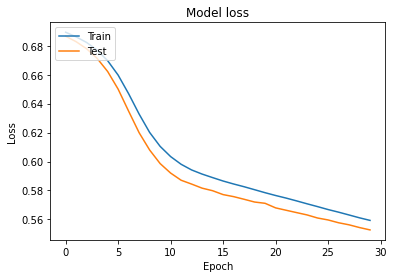

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model = keras.Sequential(
    [
     keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False),
     keras.layers.Bidirectional(keras.layers.LSTM(embedding_dim, return_sequences=True)),
     keras.layers.Bidirectional(keras.layers.LSTM(embedding_dim)),
     keras.layers.Dense(16, activation='relu'),
     keras.layers.Dense(1, activation='sigmoid')
    ]
)

adam = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 25)          330000    
_________________________________________________________________
bidirectional_12 (Bidirectio (None, None, 50)          10200     
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 50)                15200     
_________________________________________________________________
dense_16 (Dense)             (None, 16)                816       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 356,233
Trainable params: 26,233
Non-trainable params: 330,000
_________________________________________________________________


In [ ]:
history = model.fit(training_padded, training_labels,
          epochs=50, verbose=1,
          validation_data=(testing_padded, testing_labels))

Epoch 1/50
  2/750 [..............................] - ETA: 41s - loss: 0.6878 - accuracy: 0.6250

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


750/750 [==============================] - 44s 58ms/step - loss: 0.6908 - accuracy: 0.5235 - val_loss: 0.6882 - val_accuracy: 0.5311
Epoch 2/50
750/750 [==============================] - 44s 59ms/step - loss: 0.6872 - accuracy: 0.5345 - val_loss: 0.6834 - val_accuracy: 0.5532
Epoch 3/50
750/750 [==============================] - 46s 61ms/step - loss: 0.6826 - accuracy: 0.5591 - val_loss: 0.6781 - val_accuracy: 0.5858
Epoch 4/50
750/750 [==============================] - 46s 61ms/step - loss: 0.6769 - accuracy: 0.5855 - val_loss: 0.6707 - val_accuracy: 0.6170
Epoch 5/50
750/750 [==============================] - 45s 61ms/step - loss: 0.6681 - accuracy: 0.6110 - val_loss: 0.6570 - val_accuracy: 0.6434
Epoch 6/50
750/750 [==============================] - 46s 62ms/step - loss: 0.6524 - accuracy: 0.6379 - val_loss: 0.6405 - val_accuracy: 0.6571
Epoch 7/50
750/750 [==============================] - 46s 61ms/step - loss: 0.6392 - accuracy: 0.6452 - val_loss: 0.6267 - val_accuracy: 0.6592
Epo

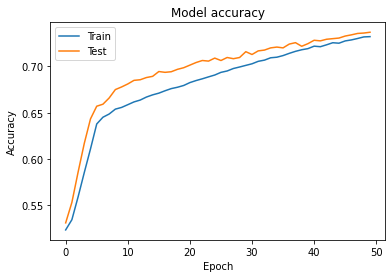

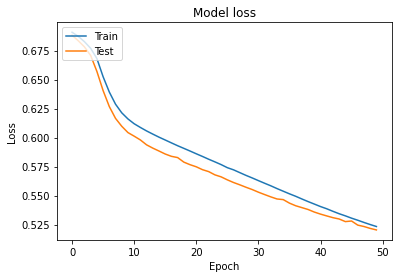

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
!nvidia-smi

Thu Aug 26 10:44:15 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    26W /  70W |    690MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
model = keras.Sequential(
    [
     keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False),
     keras.layers.Bidirectional(keras.layers.LSTM(embedding_dim, return_sequences=True)),
     keras.layers.Bidirectional(keras.layers.LSTM(embedding_dim)),
     keras.layers.Dense(16, activation='relu'),
     keras.layers.Dense(1, activation='sigmoid')
    ]
)

adam = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 25)          330000    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 50)          10200     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 50)                15200     
_________________________________________________________________
dense (Dense)                (None, 16)                816       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 356,233
Trainable params: 26,233
Non-trainable params: 330,000
_________________________________________________________________


In [ ]:
history = model.fit(training_padded, training_labels,
          epochs=70, verbose=1,
          validation_data=(testing_padded, testing_labels))

Epoch 1/70
750/750 [==============================] - 100s 120ms/step - loss: 0.6892 - accuracy: 0.5239 - val_loss: 0.6859 - val_accuracy: 0.5332
Epoch 2/70
750/750 [==============================] - 88s 117ms/step - loss: 0.6844 - accuracy: 0.5504 - val_loss: 0.6808 - val_accuracy: 0.5687
Epoch 3/70
750/750 [==============================] - 88s 118ms/step - loss: 0.6790 - accuracy: 0.5754 - val_loss: 0.6744 - val_accuracy: 0.6014
Epoch 4/70
750/750 [==============================] - 88s 117ms/step - loss: 0.6710 - accuracy: 0.6038 - val_loss: 0.6627 - val_accuracy: 0.6220
Epoch 5/70
750/750 [==============================] - 88s 117ms/step - loss: 0.6585 - accuracy: 0.6197 - val_loss: 0.6496 - val_accuracy: 0.6361
Epoch 6/70
750/750 [==============================] - 88s 117ms/step - loss: 0.6460 - accuracy: 0.6312 - val_loss: 0.6371 - val_accuracy: 0.6439
Epoch 7/70
750/750 [==============================] - 88s 117ms/step - loss: 0.6349 - accuracy: 0.6391 - val_loss: 0.6270 - val_a

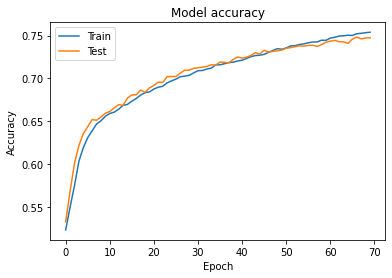

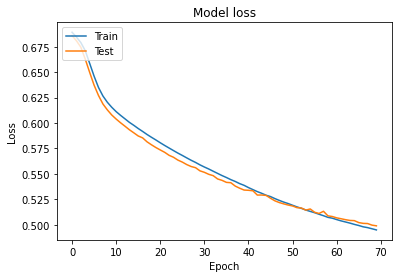

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()